# Haar System

In [230]:
import numpy as np

def approximation(array):
    return array[:array.shape[0]//2]

def details(array):
    return array[array.shape[0]//2:]

root2 = np.sqrt(2)
s = np.array([32, 32, 16, 8, 24, 16, 64, 32])


## 1 dimension

### Decomposition 

In [121]:
def direct_wavelet(array,output):
    N, N2, = array.shape[0], array.shape[0] // 2
    for i in range(0,N,2):
        output[int(i/2)] = (array[i] + array[i+1])/root2
        output[int(i/2 + N2)] = (array[i] - array[i+1])/root2
    return output

def inverse_wavelet(output,signal):
    N, N2,  = output.shape[0], output.shape[0] // 2
    for i in range(0,N,2):
        signal[i] = (output[int(i/2)] + output[int(i/2 + N2)])/root2
        signal[i+1] = (output[int(i/2)] - output[int(i/2 + N2)])/root2
    return signal


In [122]:
# DIRECT WAVELET TRANSFORM --> dwt
dwt = np.empty(len(s))
dwt = direct_wavelet(s,dwt)
print("\nApproximation coefficients (A1):", approximation(dwt))
print("Detail coefficients (D1):", details(dwt))

dwt2 = np.empty(len(approximation(dwt)))
dwt2 = direct_wavelet(approximation(dwt),dwt2)
print("\nApproximation coefficients (A2):", approximation(dwt2))
print("Detail coefficients (D2):", details(dwt2))


dwt3 = np.empty(len(approximation(dwt2)))
dwt3 = direct_wavelet(approximation(dwt2),dwt3)
print("\nApproximation coefficients (A3):", approximation(dwt3))
print("Detail coefficients (D3):", details(dwt3))


Approximation coefficients (A1): [45.254834   16.97056275 28.28427125 67.88225099]
Detail coefficients (D1): [ 0.          5.65685425  5.65685425 22.627417  ]

Approximation coefficients (A2): [44. 68.]
Detail coefficients (D2): [ 20. -28.]

Approximation coefficients (A3): [79.19595949]
Detail coefficients (D3): [-16.97056275]


### Reconstruction

In [123]:
# INVERSE WAVELET TRANSFORM
print("\nApproximation coefficients (A3):", approximation(dwt3))

rest_s2 = np.empty(2*len(approximation(dwt3)))
rest_s2 = inverse_wavelet(dwt3,rest_s2)
print("\nReconstructed Signal A2:", rest_s2)

rest_s1 = np.empty(2*len(approximation(dwt2)))
rest_s1 = inverse_wavelet(dwt2,rest_s1)
print("\nReconstructed Signal A1:", rest_s1)

rest_s = np.empty(2*len(approximation(dwt)))
rest_s = inverse_wavelet(dwt,rest_s)
print("\nReconstructed Signal:", rest_s)
print("Original Signal:", s)


Approximation coefficients (A3): [79.19595949]

Reconstructed Signal A2: [44. 68.]

Reconstructed Signal A1: [45.254834   16.97056275 28.28427125 67.88225099]

Reconstructed Signal: [32. 32. 16.  8. 24. 16. 64. 32.]
Original Signal: [32 32 16  8 24 16 64 32]


## 2 dimensions

### Decomposition

In [124]:
def split_matrix(matrix): # divide the matrix into 4 quadrants
    leftSide, rightSide = np.split(matrix, 2, axis=1)
    appr, vD = np.split(leftSide, 2, axis=0)
    hD, dD = np.split(rightSide, 2, axis=0)
    
    return appr, hD, vD, dD

def direct_wavelet2D_H(matrix): # does the direct wavelet transform horizontally
    Nf,N2,output = matrix.shape[0], matrix.shape[0]//2 ,np.zeros_like(matrix,dtype=float)
    for c in range(0, Nf, 2):
        output[:, c//2] = (matrix[:, c] + matrix[:, c+1]) / root2 
        output[:, c//2 + N2] = (matrix[:, c] - matrix[:, c+1]) / root2
    return output

def direct_wavelet2D_V(matrix): # does the direct wavelet transform vertically
    Nf,N2,output = matrix.shape[0], matrix.shape[0]//2, np.copy(matrix)
    for f in range(0, Nf, 2):
        output[f // 2, :] = (matrix[f, :] + matrix[f + 1, :]) / root2
        output[f//2 + N2, :] = (matrix[f, :] - matrix[f + 1, :]) / root2
    return output

In [229]:
matriz = np.random.randint(low=1, high=101, size=(4, 4)) * 2

# DIRECT WAVELET TRANSFORM
result = direct_wavelet2D_V(direct_wavelet2D_H(matriz))

print("\nDirect wevelet Matrix\n",result)

cA, cH, cV, cD = split_matrix(result)
print("\nApproximation coefficients (A1):\n", cA)
print("\nDetail coefficients (D1)")
print(f"Horizontal Details (cH):\n{cH}\n")
print(f"Vertical Details (cV):\n{cV}\n")
print(f"Diagonal Details (cD):\n{cD}\n")


Direct wevelet Matrix
 [[112.  75.   4.  -1.]
 [163. 202.  85.  50.]
 [ 46.  15.  14. -49.]
 [ 73. -16.  15. -40.]]

Approximation coefficients (A1):
 [[112.  75.]
 [163. 202.]]

Detail coefficients (D1)
Horizontal Details (cH):
[[ 4. -1.]
 [85. 50.]]

Vertical Details (cV):
[[ 46.  15.]
 [ 73. -16.]]

Diagonal Details (cD):
[[ 14. -49.]
 [ 15. -40.]]



### Reconstriction

In [134]:
def inverse_wavelet2D_H(matrix):
    Nf, N2 = matrix.shape[1], matrix.shape[1]//2
    output = np.zeros_like(matrix, dtype=float)
    for c in range(N2):
        output[:, c*2] = (matrix[:, c] + matrix[:, c+N2]) / root2
        output[:, c*2+1] = (matrix[:, c] - matrix[:, c+N2]) / root2
    return output

def inverse_wavelet2D_V(matrix):
    N2, Nf = matrix.shape[0]//2, matrix.shape[0]
    output = np.copy(matrix)
    for f in range(N2):
        output[f*2, :] = (matrix[f, :] + matrix[f+N2, :]) / root2
        output[f*2+1, :] = (matrix[f, :] - matrix[f+N2, :]) / root2
    return output

In [227]:
# INVERSE WAVELET TRANSFORM
reconstructed_matriz = np.zeros_like(result, dtype=float)
reconstructed_matriz = inverse_wavelet2D_H(inverse_wavelet2D_V(result))


print("\nOriginal Signal:\n", matriz)
print("\nDirect wevelet Matrix\n",result)

print("\nReconstructed Signal:\n", reconstructed_matriz)
print("\nDiference between Reconstructed and Original:\n",  np.round(abs(reconstructed_matriz - matriz), 8))


Original Signal:
 [[ 94 194 172 118]
 [122 118  56  16]
 [116  94 150 138]
 [194  78  52 176]]

Direct wevelet Matrix
 [[264. 181. -48.  47.]
 [241. 258.  69. -56.]
 [ 24. 109. -52.   7.]
 [-31.  30. -47.  68.]]

Reconstructed Signal:
 [[ 94. 194. 172. 118.]
 [122. 118.  56.  16.]
 [116.  94. 150. 138.]
 [194.  78.  52. 176.]]

Diference between Reconstructed and Original:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Example with an Image

In [160]:
import cv2
import IPython
import matplotlib.pyplot as plt

def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

def p_new(matrix):
    max,min  = np.max(matrix), np.min(matrix)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            matrix[i][j] = ((matrix[i][j]-min)*255.0)/(max-min)
    return matrix

#### Testing with the normalization

In [218]:
'''
STILL TESTING 

imgOr = cv2.imread(('image_color.jpg'), cv2.IMREAD_GRAYSCALE)
imgOr = np.array(imgOr)

# DIRECT WAVELET TRANSFORM 
result_data = direct_wavelet2D_H(imgOr)
leftSide, rightSide = np.split(result_data, 2, axis=1)
leftSide, rightSide = p_new(leftSide), p_new(rightSide)
horizontal1 = np.concatenate((leftSide, rightSide), axis=1)
horizontal1 = direct_wavelet2D_V(horizontal1)
cA, cH, cV, cD = split_matrix(horizontal1)
cA = p_new(cA)
cV = p_new(cV)
cH = p_new(cH)
cD = p_new(cD)

'''

### Graphics

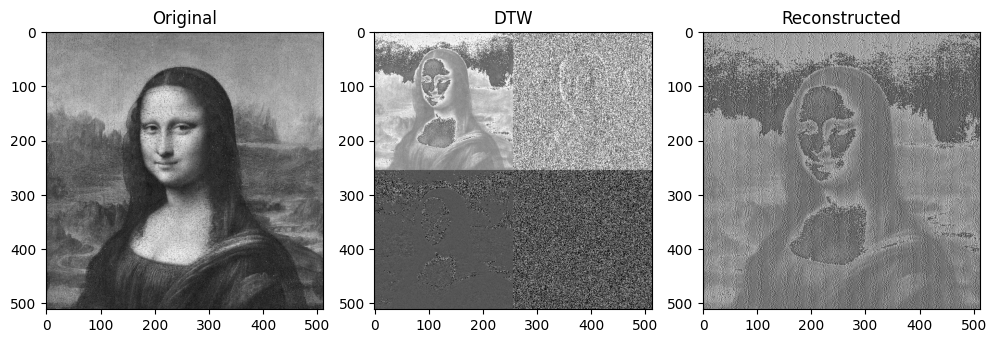

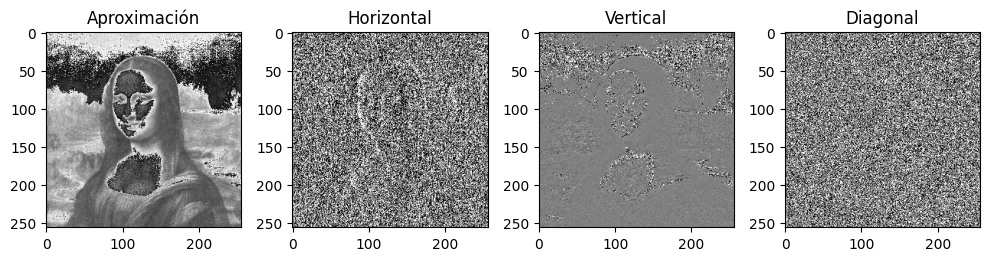

In [219]:
imgOr = cv2.imread(('image_color.jpg'), cv2.IMREAD_GRAYSCALE)

# DIRECT WAVELET TRANSFORM 
result_data = direct_wavelet2D_V(direct_wavelet2D_H(imgOr))
cA, cH, cV, cD = split_matrix(result_data)

reconstructed = inverse_wavelet2D_H(inverse_wavelet2D_V(result_data))

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(imgOr, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(result_data, cmap='gray')
axes[1].set_title('DTW')
axes[2].imshow(reconstructed, cmap='gray')
axes[2].set_title('Reconstructed')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(cA, cmap='gray')
axes[0].set_title('Aproximación')
axes[1].imshow(cH, cmap='gray')
axes[1].set_title('Horizontal')
axes[2].imshow(cV, cmap='gray')
axes[2].set_title('Vertical')
axes[3].imshow(cD, cmap='gray')
axes[3].set_title('Diagonal')

plt.tight_layout()
plt.show()

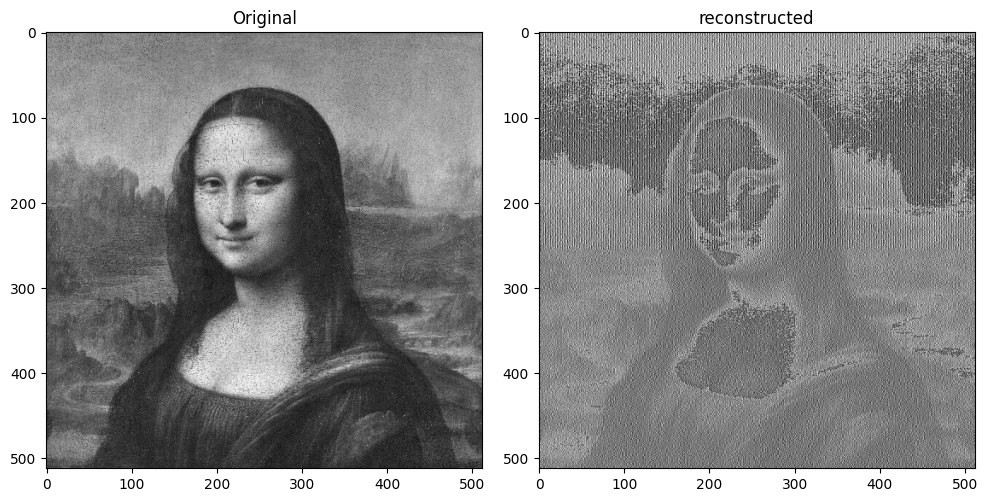

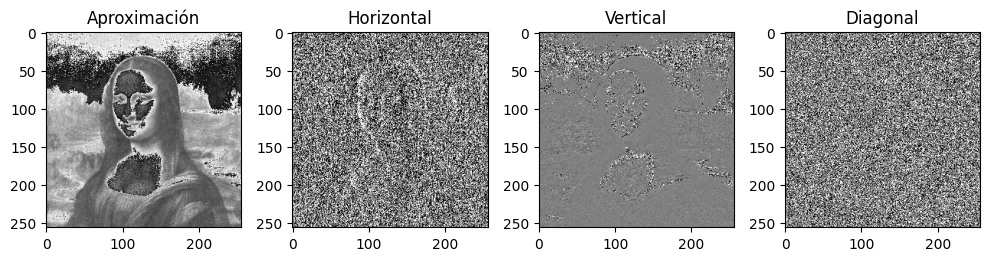

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(imgOr, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(reconstructed, cmap='gray')
axes[1].set_title('reconstructed')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(cA, cmap='gray')
axes[0].set_title('Aproximación')
axes[1].imshow(cH, cmap='gray')
axes[1].set_title('Horizontal')
axes[2].imshow(cV, cmap='gray')
axes[2].set_title('Vertical')
axes[3].imshow(cD, cmap='gray')
axes[3].set_title('Diagonal')

plt.tight_layout()
plt.show()

### Others TESTING


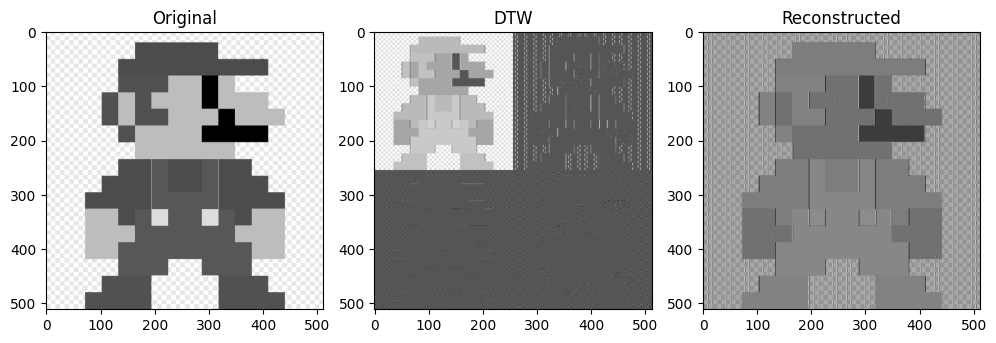

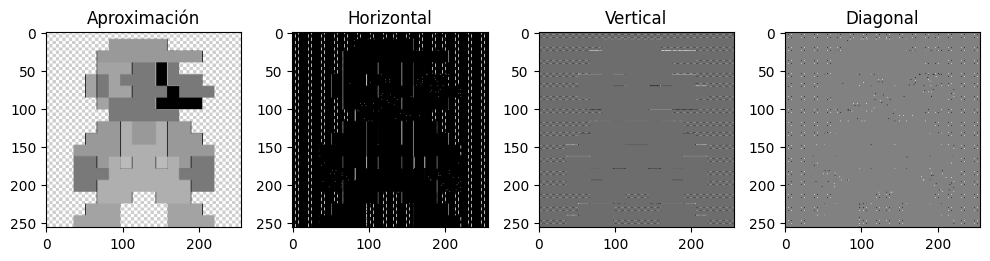

In [214]:
# foto = np.random.randint(low=1, high=101, size=(16, 16)) * 2

foto = cv2.imread(("mario.png"), cv2.IMREAD_GRAYSCALE)
# foto =  cv2.resize()

# DIRECT WAVELET TRANSFORM 
result_data = direct_wavelet2D_V(direct_wavelet2D_H(foto))
cA, cH, cV, cD = split_matrix(result_data)

reconstructed = inverse_wavelet2D_H(inverse_wavelet2D_V(result_data))

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(foto, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(result_data, cmap='gray')
axes[1].set_title('DTW')
axes[2].imshow(reconstructed, cmap='gray')
axes[2].set_title('Reconstructed')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(cA, cmap='gray')
axes[0].set_title('Aproximación')
axes[1].imshow(cH, cmap='gray')
axes[1].set_title('Horizontal')
axes[2].imshow(cV, cmap='gray')
axes[2].set_title('Vertical')
axes[3].imshow(cD, cmap='gray')
axes[3].set_title('Diagonal')

plt.tight_layout()
plt.show()

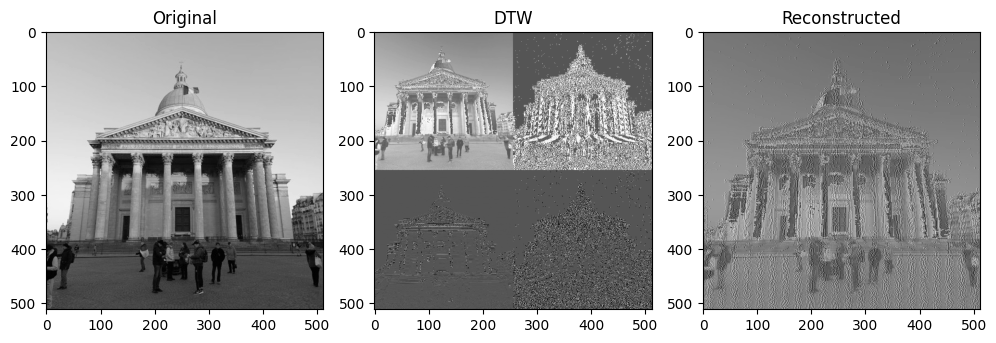

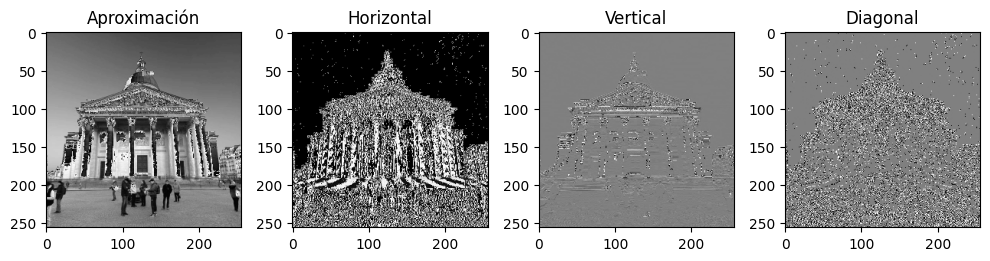

In [215]:
# foto = cv2.imread(("formas.png"), cv2.IMREAD_GRAYSCALE)
foto = cv2.imread(("imagen2.jpeg"), cv2.IMREAD_GRAYSCALE)

# DIRECT WAVELET TRANSFORM 
result_data = direct_wavelet2D_V(direct_wavelet2D_H(foto))
cA, cH, cV, cD = split_matrix(result_data)

reconstructed = inverse_wavelet2D_H(inverse_wavelet2D_V(result_data))

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(foto, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(result_data, cmap='gray')
axes[1].set_title('DTW')
axes[2].imshow(reconstructed, cmap='gray')
axes[2].set_title('Reconstructed')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(cA, cmap='gray')
axes[0].set_title('Aproximación')
axes[1].imshow(cH, cmap='gray')
axes[1].set_title('Horizontal')
axes[2].imshow(cV, cmap='gray')
axes[2].set_title('Vertical')
axes[3].imshow(cD, cmap='gray')
axes[3].set_title('Diagonal')

plt.tight_layout()
plt.show()

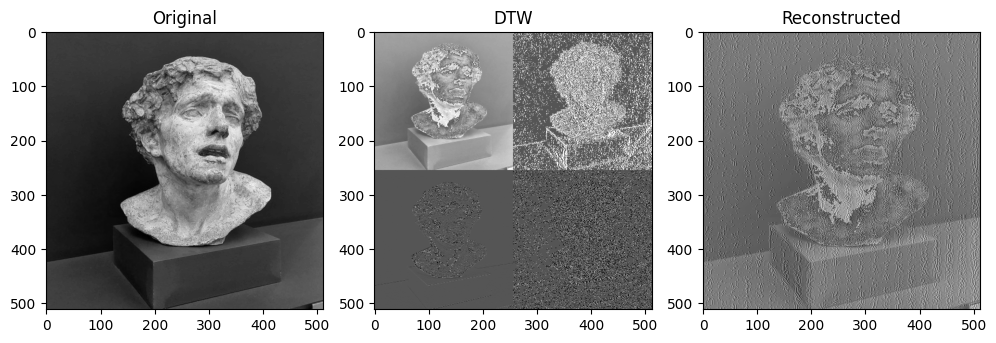

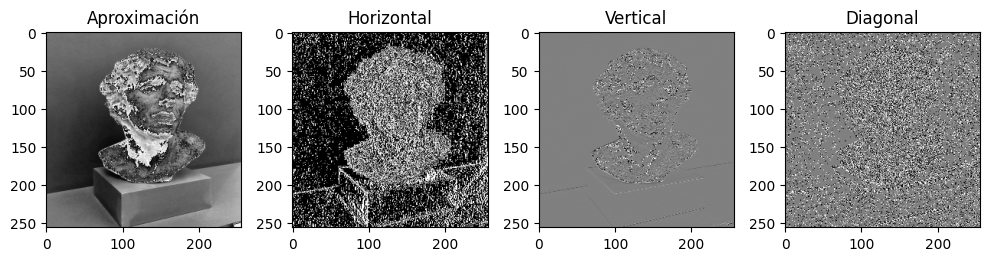

In [216]:
# foto = cv2.imread(("formas.png"), cv2.IMREAD_GRAYSCALE)
foto = cv2.imread(("imagen1.jpeg"), cv2.IMREAD_GRAYSCALE)

# DIRECT WAVELET TRANSFORM 
result_data = direct_wavelet2D_V(direct_wavelet2D_H(foto))
cA, cH, cV, cD = split_matrix(result_data)

reconstructed = inverse_wavelet2D_H(inverse_wavelet2D_V(result_data))

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(foto, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(result_data, cmap='gray')
axes[1].set_title('DTW')
axes[2].imshow(reconstructed, cmap='gray')
axes[2].set_title('Reconstructed')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(cA, cmap='gray')
axes[0].set_title('Aproximación')
axes[1].imshow(cH, cmap='gray')
axes[1].set_title('Horizontal')
axes[2].imshow(cV, cmap='gray')
axes[2].set_title('Vertical')
axes[3].imshow(cD, cmap='gray')
axes[3].set_title('Diagonal')

plt.tight_layout()
plt.show()
